In [3]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

from pathlib import Path
import pandas as pd

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [78]:
INF = 999999

def plot_explored(f, steps=-1, box=INF, l=6, lbox=0, path=True, matches=True):
    t = pd.read_csv(f, delimiter=',', dtype=None)
    total_t = len(t.index)
 
    max_steps = len(t) if steps == -1 else steps
    
    if box == INF:
        n, m = max(t[:,0]) + 1, max(t[:,1]) + 1
    else:
        n, m = box-lbox, box-lbox
    
    img = np.ones((n, m, 4))
    img.fill(0.97)  # grey
    
    def ok(x): return (lbox <= x) & (x < box)
    
    subt = t.loc[ok(t.i) & ok(t.j)]
    
    min_step = INF
    for index, row in subt.loc[subt['type'] == 'Expanded'].iterrows():
        assert row.step != -1
        min_step = min(min_step, row.step)
    
    for index, row in subt.loc[subt['type'] == 'Expanded'].iterrows():
        assert row.step != -1
        if row.step > max_steps:
            continue
        val = (row.step-min_step) / (max_steps-min_step)
        if val <= 1.0:
            img[row.i-lbox, row.j-lbox] = cm.cool(val)
        
    if path:
        for index, row in subt.loc[subt['type'] == 'Path'].iterrows():
            img[row.i-lbox, row.j-lbox] = mcolors.to_rgba('xkcd:black')
     
    if matches:
        for index, row in subt.loc[subt['type'] == 'Match'].iterrows():
            for d in range(l):
                if row.i+d-lbox < img.shape[0] and row.j+d-lbox < img.shape[1]:
                    img[row.i+d-lbox, row.j+d-lbox] = mcolors.to_rgba('xkcd:canary')
    
    fig, ax = plt.subplots(figsize=(20,16))
    title = f.stem
    ax.set_title('{} ({})'.format(title, total_t), y=-0.01)
    ax.xaxis.tick_top()
    ax.grid(False)
    
    ax.imshow(img)
    fig.savefig('imgs/'+title+'.png')

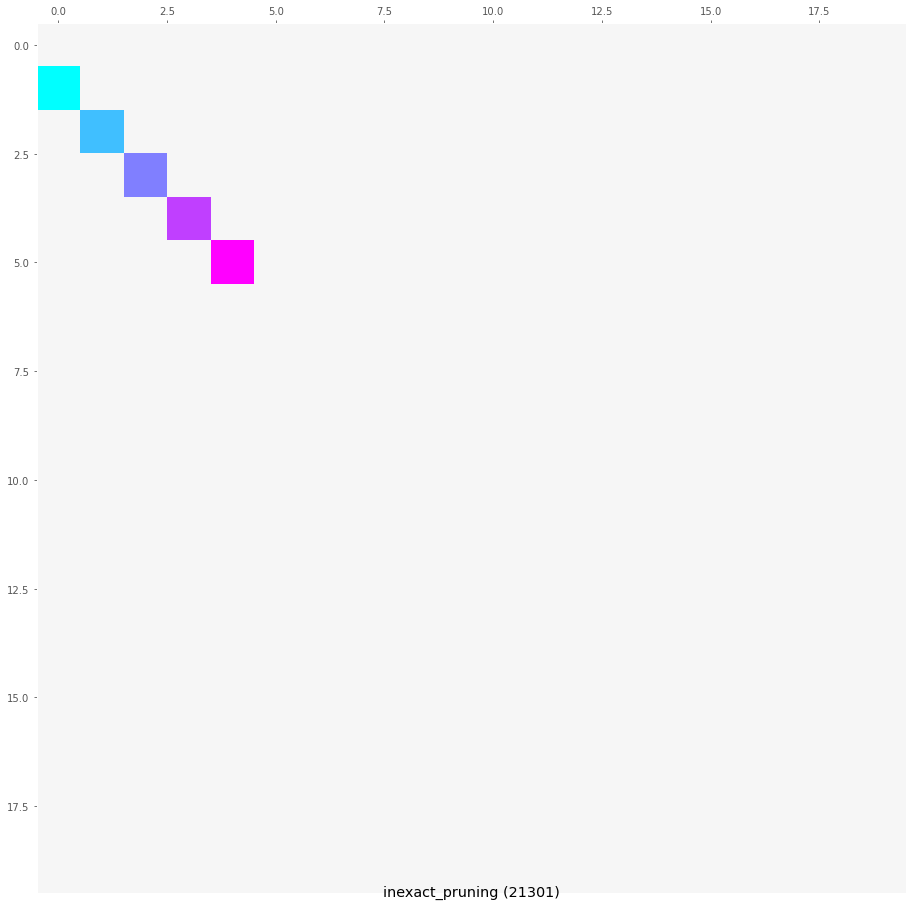

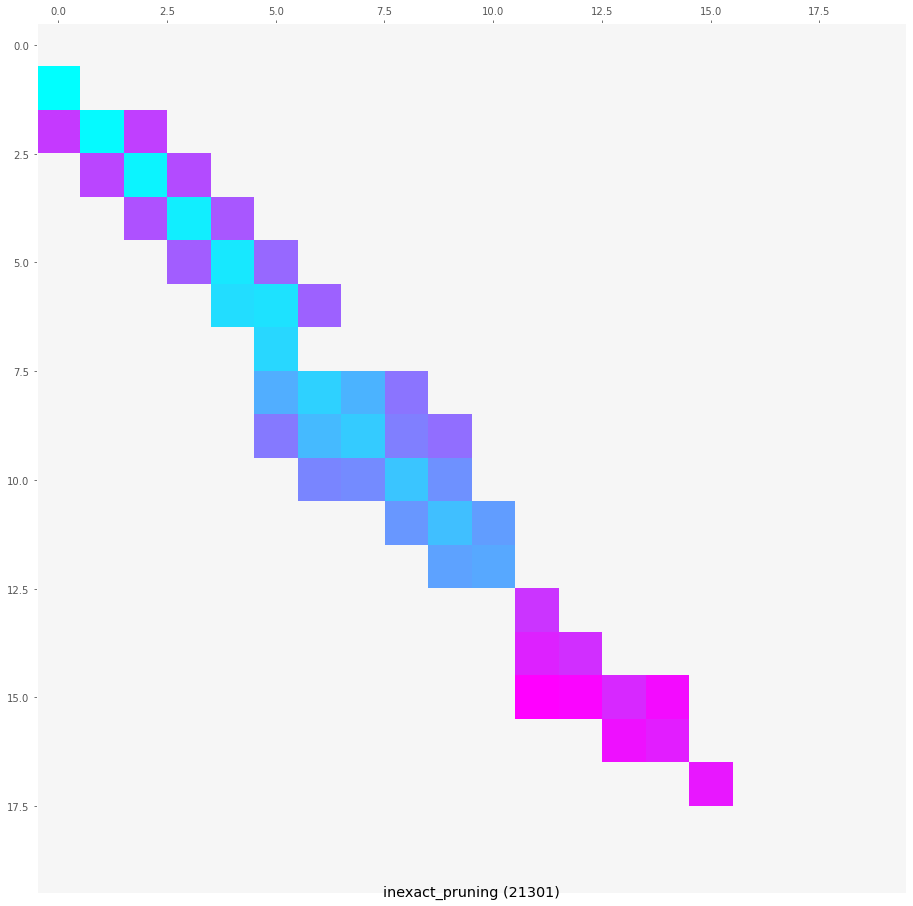

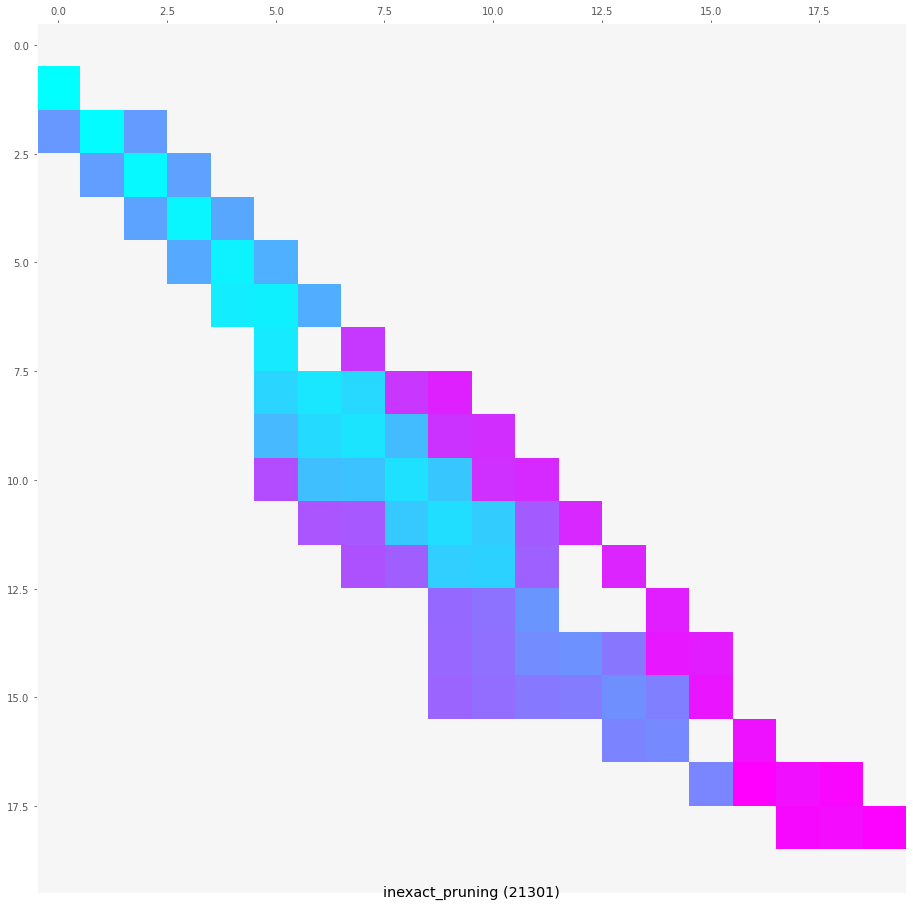

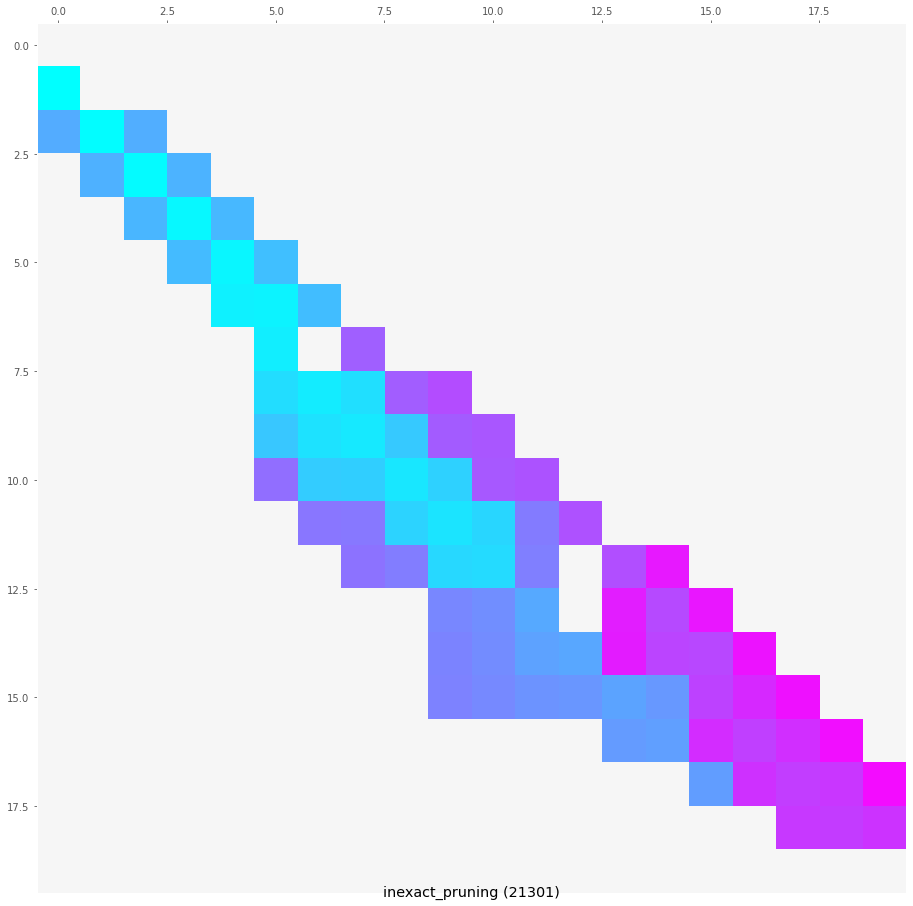

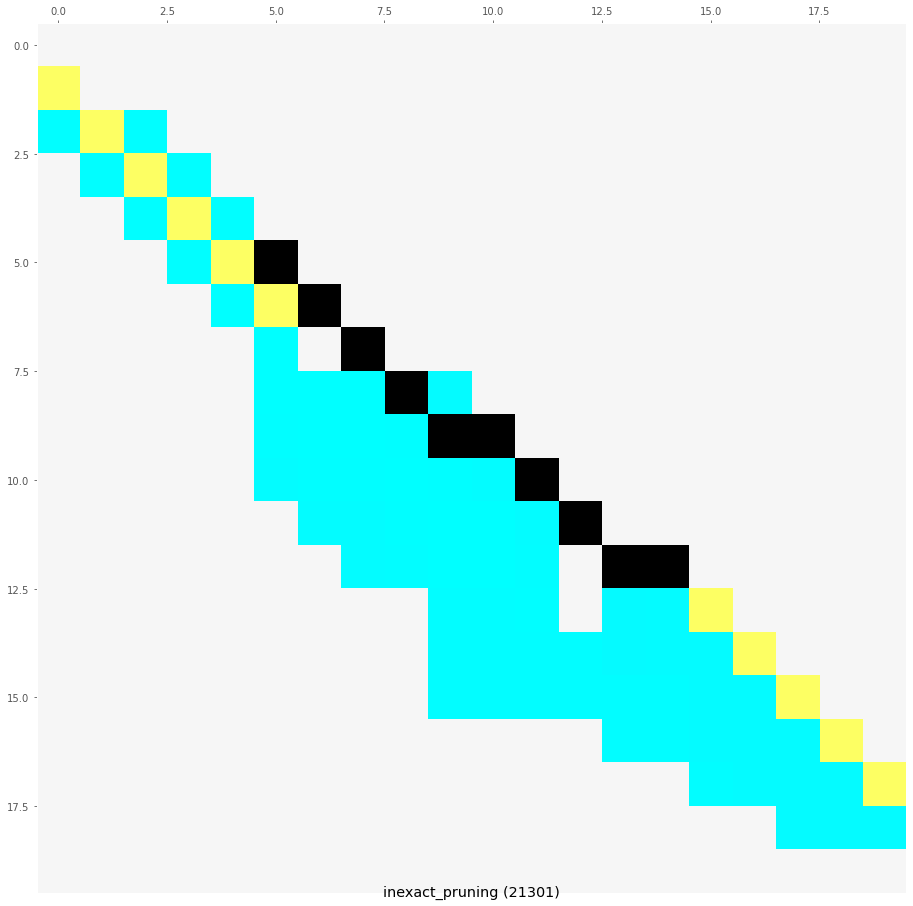

In [93]:
d = Path('stats/')
min_steps = 10000000
all_files = list(d.glob('*.csv'))
some_files = [d/'inexact_pruning.csv']

files = some_files
for f in files:
    t = pd.read_csv(f, delimiter=',', dtype=None)
    #display(t)
    min_steps = min(min_steps, max(t['step']))
for f in files:
    plot_explored(f, lbox=215,box=235, steps=400, l=6, path=False, matches=False)
    plot_explored(f, lbox=215,box=235, steps=440, l=6, path=False, matches=False)
    plot_explored(f, lbox=215,box=235, steps=480, l=6, path=False, matches=False)
    plot_explored(f, lbox=215,box=235, steps=500, l=6, path=False, matches=False)
    plot_explored(f, lbox=215,box=235, steps=5000, l=6)

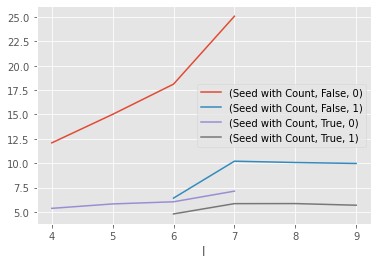

In [12]:
def plot_l():
    f = 'stats/table.csv'
    t = pd.read_csv(f, delimiter=',', dtype=None)
    #display(t)
    t['algo'] = t.heuristic + ' with ' + t.distance_function
    t['band'] = t.explored / t.len_a
    subt = t.loc[(t.error_rate == 0.1)]
    #display(subt)

    fig, ax = plt.subplots()

    for key, grp in subt.groupby(['algo', 'pruning', 'match_distance']):
        ax = grp.plot(ax=ax, kind='line', x='l', y='band', label=key)

    plt.legend(loc='best')
    plt.show()

plot_l()

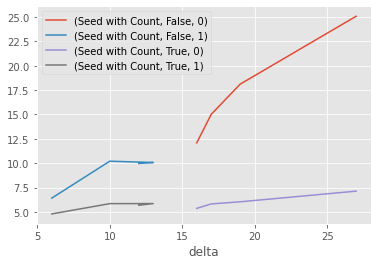

In [13]:
def plot_():
    f = 'stats/table.csv'
    t = pd.read_csv(f, delimiter=',', dtype=None)
    t['algo'] = t.heuristic + ' with ' + t.distance_function
    t['band'] = t.explored / t.len_a
    t['delta'] = t.distance - t.root_h
    
    subt = t.loc[(t.error_rate == 0.1)]
    #display(subt)

    fig, ax = plt.subplots()

    for key, grp in subt.groupby(['algo', 'pruning', 'match_distance']):
        ax = grp.plot(ax=ax, kind='line', x='delta', y='band', label=key)

    plt.legend(loc='best')
    plt.show()

plot_()